In [0]:
from tensorflow.keras.models import model_from_json

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
json_file = open('/content/drive/My Drive/ToMau/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("/content/drive/My Drive/ToMau/model.h5")

In [90]:
from google.colab import files
uploaded = files.upload()

Saving vo-chong-a-phu.jpg to vo-chong-a-phu.jpg


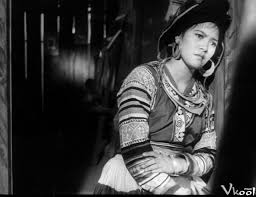

In [91]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread("vo-chong-a-phu.jpg",0)
cv2_imshow(img)

In [0]:
height, width=img.shape

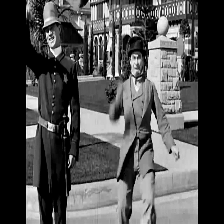

In [82]:

img_resized=cv2.resize(img, (224,224))
cv2_imshow(img_resized)

In [0]:
img_resized=cv2.cvtColor(img_resized, cv2.COLOR_GRAY2BGR)

In [0]:
import tensorflow as tf
x=tf.reshape(img_resized, shape=[-1,224,224,3])
hs=model.predict(x, steps=1)

In [0]:
import numpy as np
color=np.zeros((224,224,3))
color[:,:,:2]=hs
color=cv2.resize(color, (width, height))

In [0]:
img2=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
img2[:,:,:2]=color[:,:,:2]

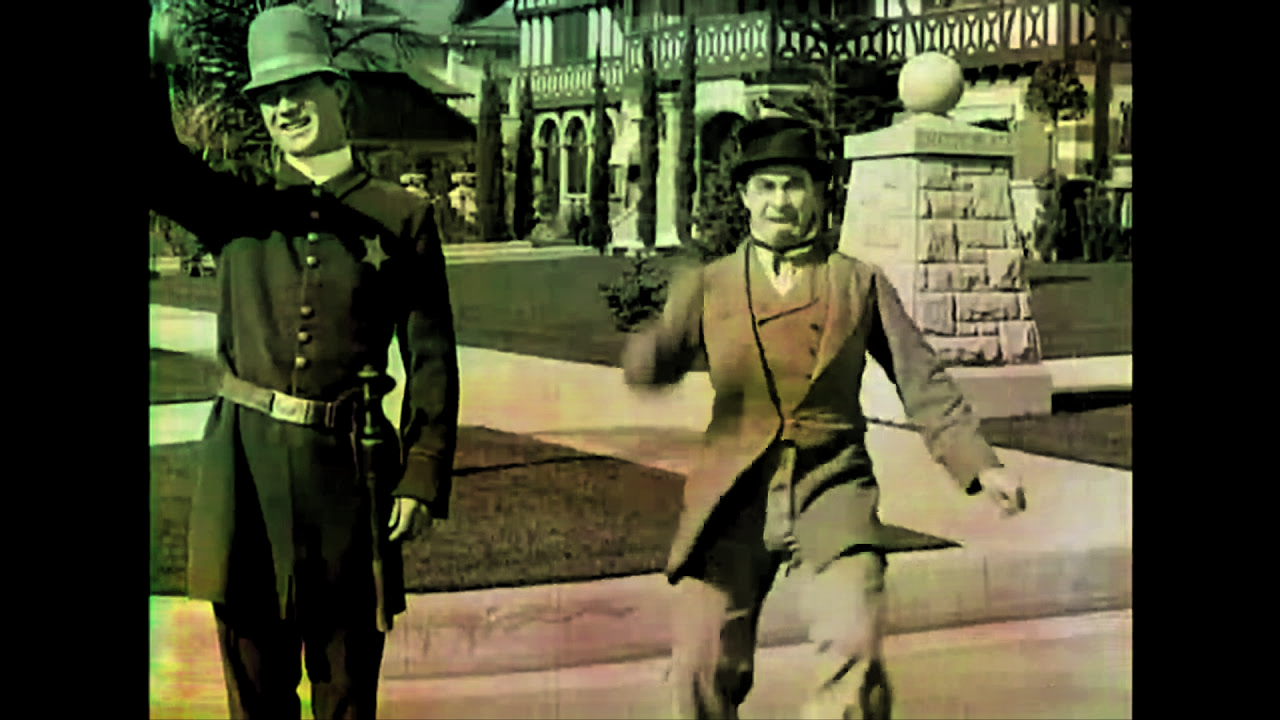

In [87]:
img2=cv2.cvtColor(img2, cv2.COLOR_HSV2BGR)
cv2_imshow(img2)